<a href="https://colab.research.google.com/github/hyo250/gittest/blob/master/Dacon_2018_%EB%8C%80%EC%97%AC%EC%86%8C%EB%B3%84_%EB%94%B0%EB%A6%89%EC%9D%B4_%EB%8C%80%EC%97%AC%EA%B1%B4%EC%88%98_%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
cd /content/drive/MyDrive/인공지능실습/모두의 딥러닝/dataset/

/content/drive/MyDrive/인공지능실습/모두의 딥러닝/dataset


# https://dailyheumsi.tistory.com/95
- 참고사이트

In [71]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings

warnings.filterwarnings('ignore')

In [77]:
from matplotlib import font_manager
font_family = font_manager.FontProperties(fname='./fonts/a펜글씨B.otf').get_name()
plt.rc('font', family=font_family)


# 1. 2018 데이터만 가져와서 합치기

In [3]:
import os

dirs = os.getcwd() + '/따릉이/' 
files = os.listdir(dirs)
files

['2018 마포구 날씨.csv',
 '서울특별시 공공자전거 시간대별 대여정보_201801_02.xlsx',
 '서울특별시 공공자전거 시간대별 대여정보_201808.xlsx',
 '서울특별시 공공자전거 시간대별 대여정보_201803_04.xlsx',
 '서울특별시 공공자전거 시간대별 대여정보_201805.xlsx',
 '서울특별시 공공자전거 시간대별 대여정보_201807.xlsx',
 '서울특별시 공공자전거 시간대별 대여정보_201810.xlsx',
 '서울특별시 공공자전거 시간대별 대여정보_201806.xlsx',
 '서울특별시 공공자전거 시간대별 대여정보_201809.xlsx',
 '서울특별시 공공자전거 시간대별 대여정보_201811.xlsx',
 '2018.pkl',
 '공공자전거 대여소 정보(21.01.31 기준).csv']

In [4]:
files = [file for file in files if '2018' in file]
files

['2018 마포구 날씨.csv',
 '서울특별시 공공자전거 시간대별 대여정보_201801_02.xlsx',
 '서울특별시 공공자전거 시간대별 대여정보_201808.xlsx',
 '서울특별시 공공자전거 시간대별 대여정보_201803_04.xlsx',
 '서울특별시 공공자전거 시간대별 대여정보_201805.xlsx',
 '서울특별시 공공자전거 시간대별 대여정보_201807.xlsx',
 '서울특별시 공공자전거 시간대별 대여정보_201810.xlsx',
 '서울특별시 공공자전거 시간대별 대여정보_201806.xlsx',
 '서울특별시 공공자전거 시간대별 대여정보_201809.xlsx',
 '서울특별시 공공자전거 시간대별 대여정보_201811.xlsx',
 '2018.pkl']

In [ ]:
column_types = {
    '대여일자': 'datetime64[ns]',
    '대여시간': 'int32',
    '대여소번호': 'category',
    '대여소명': 'category',
    '대여구분코드': 'category',
    '성별': 'category',
    '연령대코드': 'category',
    '이용건수': 'int32',
    '운동량': 'float32',
    '탄소량': 'float32',
    '이동거리': 'int32',
    '이동시간': 'int32',
}

In [31]:
try:
    df = pd.read_pickle('./따릉이/2018.pkl')

except:
    df = pd.DataFrame()

    total = len(files)
    for i, file in enumerate(files, 1):
        print("%d/%d loaded..." %(i, total))

        formatter = file.split('.')[1]
        if formatter == 'xlsx':
            _df = pd.read_excel(dirs + file,
                                dtype = column_types,)
        elif formatter == 'csv':
            _df = pd.read_csv(dirs + file,
                         dtype = column_types,
                         parse_dates = ['대여일자'],
                         encoding='utf-8',
                        )
        df = pd.concat([df, _df])

In [32]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5986984 entries, 0 to 896886
Data columns (total 12 columns):
 #   Column  Dtype         
---  ------  -----         
 0   대여일자    datetime64[ns]
 1   대여시간    int32         
 2   대여소번호   int64         
 3   대여소명    object        
 4   대여구분코드  category      
 5   성별      category      
 6   연령대코드   category      
 7   이용건수    int32         
 8   운동량     float32       
 9   탄소량     float32       
 10  이동거리    int32         
 11  이동시간    int32         
dtypes: category(3), datetime64[ns](1), float32(2), int32(4), int64(1), object(1)
memory usage: 882.4 MB


In [33]:
df.head()

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,이동시간
0,2018-10-01,0,1336,성북3교 위,정기권,F,~10대,1,73.620003,0.66,2860,16
1,2018-10-01,0,1009,천호역4번출구(현대백화점),정기권,F,~10대,1,15.860000,0.18,770,5
2,2018-10-01,0,1619,중계동 하나프라자빌딩 앞(중1-1),정기권,F,~10대,1,65.639999,0.60,2590,16
3,2018-10-01,0,1201,가락시장역 3번 출구,정기권,F,~10대,1,87.910004,1.03,4440,27
4,2018-10-01,0,739,신월사거리,정기권,F,20대,1,81.730003,0.80,3440,28


In [34]:
df.tail()

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,이동시간
896882,2018-06-30,23,1210,롯데월드타워(잠실역2번출구 쪽),단체권,F,40대,2,135.830002,1.59,6860,90
896883,2018-06-30,23,747,목동3단지 상가,단체권,M,20대,2,225.059998,1.78,7680,34
896884,2018-06-30,23,3509,세종사이버대학교,단체권,M,20대,2,706.570007,6.36,27450,216
896885,2018-06-30,23,1122,황금내근린공원,단체권,M,20대,2,515.210022,3.87,16680,97
896886,2018-06-30,23,170,가재울 뉴타운 주유소 옆,단체권,M,40대,2,329.209991,2.97,12790,95


In [35]:
df.to_pickle('./따릉이/2018.pkl')

# 2. 마포구만 추출하기

In [36]:
rentals = pd.read_csv("따릉이/공공자전거 대여소 정보(21.01.31 기준).csv", encoding='cp949')
rental_no = rentals.groupby('자치구')['대여소\n번호'].unique().loc['마포구']
rental_no


array([ 101,  102,  103,  104,  105,  106,  107,  108,  109,  111,  112,
        113,  114,  118,  119,  120,  121,  122,  124,  125,  126,  127,
        129,  130,  136,  142,  143,  144,  145,  146,  147,  148,  150,
        151,  152,  153,  154,  155,  156,  157,  181,  182,  183,  184,
        185,  186,  199,  400,  401,  402,  403,  405,  406,  407,  408,
        409,  410,  411,  412,  413,  414,  415,  416,  417,  418,  419,
        420,  421,  422,  424,  425,  426,  427,  432,  436,  437,  438,
        439,  440,  487,  489,  490,  491,  492,  493,  494,  495,  497,
        498, 3002, 3003, 3005, 3006, 3007, 3008, 3009, 3010, 3011, 4202,
       4205, 4206, 4210])

In [37]:
rentals.head()

,대여소\n번호,보관소(대여소)명,자치구,상세주소,위도,경도,설치\n시기,거치대수(LCD),거치대수(QR),운영\n방식
0,301,경복궁역 7번출구 앞,종로구,서울특별시 종로구 사직로 지하130,37.575794,126.971451,2015-10-07,16.0,NaN,LCD
1,302,경복궁역 4번출구 뒤,종로구,서울특별시 종로구 사직로 지하130,37.575947,126.974060,2015-10-07,12.0,NaN,LCD
2,303,광화문역 1번출구 앞,종로구,서울특별시 종로구 세종대로 지하189,37.571770,126.974663,2015-10-07,8.0,NaN,LCD
3,304,광화문역 2번출구 앞,종로구,서울특별시 종로구 세종대로 지하172,37.572113,126.977577,2021-01-26,NaN,7.0,QR
4,305,종로구청 옆,종로구,서울특별시 종로구 삼봉로 43,37.572582,126.978355,2015-10-07,16.0,NaN,LCD


In [38]:
#마포구 해당 데이터 추출
df = df[df['대여소번호'].isin(rental_no)]
df.shape

(554216, 12)

In [39]:
#rental 거치대수 합치기
rentals=rentals.fillna(0)
rentals.rename(columns={'대여소\n번호': '대여소번호'}, inplace=True) #df.rename(columns = {'old_nm' : 'new_nm'}, inplace = True)
rentals['거치대수']=rentals['거치대수(LCD)']+rentals['거치대수(QR)']

In [40]:
rentals.head()

,대여소번호,보관소(대여소)명,자치구,상세주소,위도,경도,설치\n시기,거치대수(LCD),거치대수(QR),운영\n방식,거치대수
0,301,경복궁역 7번출구 앞,종로구,서울특별시 종로구 사직로 지하130,37.575794,126.971451,2015-10-07,16.0,0.0,LCD,16.0
1,302,경복궁역 4번출구 뒤,종로구,서울특별시 종로구 사직로 지하130,37.575947,126.974060,2015-10-07,12.0,0.0,LCD,12.0
2,303,광화문역 1번출구 앞,종로구,서울특별시 종로구 세종대로 지하189,37.571770,126.974663,2015-10-07,8.0,0.0,LCD,8.0
3,304,광화문역 2번출구 앞,종로구,서울특별시 종로구 세종대로 지하172,37.572113,126.977577,2021-01-26,0.0,7.0,QR,7.0
4,305,종로구청 옆,종로구,서울특별시 종로구 삼봉로 43,37.572582,126.978355,2015-10-07,16.0,0.0,LCD,16.0


In [41]:
#얘들도 쓸모 있을 수 있으니 합쳐줌. 
df = df.merge(rentals[['대여소번호', '거치대수']], on='대여소번호')
df.head()

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,이동시간,거치대수
0,2018-10-01,0,112,극동방송국 앞,정기권,F,20대,1,14.060000,0.16,710,4,10.0
1,2018-10-01,0,112,극동방송국 앞,정기권,M,20대,1,32.669998,0.26,1100,5,10.0
2,2018-10-01,0,112,극동방송국 앞,일일권,M,50대,1,8.750000,0.08,340,7,10.0
3,2018-10-01,1,112,극동방송국 앞,정기권,M,20대,1,92.699997,0.71,3080,14,10.0
4,2018-10-01,1,112,극동방송국 앞,일일권,M,50대,1,50.970001,0.46,1980,15,10.0


# 3. 날씨 데이터 가져와서 합치기

In [42]:
weather = pd.read_csv('./따릉이/2018 마포구 날씨.csv', encoding='cp949')
weather.head()

,지점,지점명,일시,평균기온(°C),최저기온(°C),최저기온 시각(hhmi),최고기온(°C),최고기온 시각(hhmi),일강수량(mm),최대 순간 풍속(m/s),최대 순간풍속 시각(hhmi),평균 풍속(m/s),최대 순간 풍속 풍향(deg)
0,411,마포,2018-01-01,-0.5,-3.5,547,3.4,1431,0.0,7.4,1637,1.6,281.3
1,411,마포,2018-01-02,-1.3,-4.7,2344,2.0,1329,0.0,11.8,1427,2.8,323.4
2,411,마포,2018-01-03,-4.8,-7.2,616,-1.1,1422,0.0,10.4,2113,3.5,326.3
3,411,마포,2018-01-04,-4.7,-8.5,725,-1.5,1406,0.0,5.2,632,1.9,329.1
4,411,마포,2018-01-05,-2.9,-5.3,525,1.1,1440,0.0,7.2,2254,2.0,295.3


In [43]:
df['월'] = df['대여일자'].dt.month
df['일'] = df['대여일자'].dt.day
df['요일'] = df['대여일자'].dt.dayofweek
df.head()

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,이동시간,거치대수,월,일,요일
0,2018-10-01,0,112,극동방송국 앞,정기권,F,20대,1,14.060000,0.16,710,4,10.0,10,1,0
1,2018-10-01,0,112,극동방송국 앞,정기권,M,20대,1,32.669998,0.26,1100,5,10.0,10,1,0
2,2018-10-01,0,112,극동방송국 앞,일일권,M,50대,1,8.750000,0.08,340,7,10.0,10,1,0
3,2018-10-01,1,112,극동방송국 앞,정기권,M,20대,1,92.699997,0.71,3080,14,10.0,10,1,0
4,2018-10-01,1,112,극동방송국 앞,일일권,M,50대,1,50.970001,0.46,1980,15,10.0,10,1,0


In [44]:
weather.shape

(31, 13)

In [45]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   지점                31 non-null     int64  
 1   지점명               31 non-null     object 
 2   일시                31 non-null     object 
 3   평균기온(°C)          31 non-null     float64
 4   최저기온(°C)          31 non-null     float64
 5   최저기온 시각(hhmi)     31 non-null     int64  
 6   최고기온(°C)          31 non-null     float64
 7   최고기온 시각(hhmi)     31 non-null     int64  
 8   일강수량(mm)          31 non-null     float64
 9   최대 순간 풍속(m/s)     31 non-null     float64
 10  최대 순간풍속 시각(hhmi)  31 non-null     int64  
 11  평균 풍속(m/s)        31 non-null     float64
 12  최대 순간 풍속 풍향(deg)  31 non-null     float64
dtypes: float64(7), int64(4), object(2)
memory usage: 3.3+ KB


In [46]:
weather.drop(['최저기온(°C)', '최저기온 시각(hhmi)', '최고기온(°C)','최고기온 시각(hhmi)','최대 순간 풍속(m/s)','최대 순간풍속 시각(hhmi)'], axis=1, inplace=True)
weather.head()

,지점,지점명,일시,평균기온(°C),일강수량(mm),평균 풍속(m/s),최대 순간 풍속 풍향(deg)
0,411,마포,2018-01-01,-0.5,0.0,1.6,281.3
1,411,마포,2018-01-02,-1.3,0.0,2.8,323.4
2,411,마포,2018-01-03,-4.8,0.0,3.5,326.3
3,411,마포,2018-01-04,-4.7,0.0,1.9,329.1
4,411,마포,2018-01-05,-2.9,0.0,2.0,295.3


In [47]:
weather['일시'] = weather['일시'].astype('datetime64[ns]') #날짜 데이터타입을 문자열에서 날짜형으로 바꿈.
weather['월'] = weather['일시'].dt.month
weather['일'] = weather['일시'].dt.day
weather['요일'] = weather['일시'].dt.dayofweek

In [49]:
df = df.merge(weather, on=['월', '일', '요일'])
df.head()

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,이동시간,거치대수,월,일,요일,지점,지점명,일시,평균기온(°C),일강수량(mm),평균 풍속(m/s),최대 순간 풍속 풍향(deg)
0,2018-01-01,3,112,극동방송국 앞,정기권,M,~10대,1,99.790001,0.81,3500,13,10.0,1,1,0,411,마포,2018-01-01,-0.5,0.0,1.6,281.3
1,2018-01-01,3,112,극동방송국 앞,정기권,M,20대,1,71.989998,0.70,3030,13,10.0,1,1,0,411,마포,2018-01-01,-0.5,0.0,1.6,281.3
2,2018-01-01,4,112,극동방송국 앞,정기권,M,20대,1,32.669998,0.29,1250,11,10.0,1,1,0,411,마포,2018-01-01,-0.5,0.0,1.6,281.3
3,2018-01-01,4,112,극동방송국 앞,정기권,M,30대,1,177.009995,1.73,7450,26,10.0,1,1,0,411,마포,2018-01-01,-0.5,0.0,1.6,281.3
4,2018-01-01,5,112,극동방송국 앞,일일권,M,20대,2,208.919998,1.79,7700,40,10.0,1,1,0,411,마포,2018-01-01,-0.5,0.0,1.6,281.3


In [50]:
df.columns.values

array(['대여일자', '대여시간', '대여소번호', '대여소명', '대여구분코드', '성별', '연령대코드', '이용건수',
       '운동량', '탄소량', '이동거리', '이동시간', '거치대수', '월', '일', '요일', '지점', '지점명',
       '일시', '평균기온(°C)', '일강수량(mm)', '평균 풍속(m/s)', '최대 순간 풍속 풍향(deg)'],
      dtype=object)

In [51]:
df.rename(columns={'평균기온(°C)':'기온','일강수량(mm)':'강수량', '평균 풍속(m/s)':'풍속', '최대 순간 풍속 풍향(deg)':'풍향'}, inplace=True)

In [52]:
df=df.drop(['일시','지점','지점명'],axis=1)
df.columns

Index(['대여일자', '대여시간', '대여소번호', '대여소명', '대여구분코드', '성별', '연령대코드', '이용건수', '운동량',
       '탄소량', '이동거리', '이동시간', '거치대수', '월', '일', '요일', '기온', '강수량', '풍속', '풍향'],
      dtype='object')

In [53]:
df.shape

(18014, 20)

#4 . 대여소 단위로 데이터 프레임 만들기

In [55]:
df.head()

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,이동시간,거치대수,월,일,요일,기온,강수량,풍속,풍향
0,2018-01-01,3,112,극동방송국 앞,정기권,M,~10대,1,99.790001,0.81,3500,13,10.0,1,1,0,-0.5,0.0,1.6,281.3
1,2018-01-01,3,112,극동방송국 앞,정기권,M,20대,1,71.989998,0.70,3030,13,10.0,1,1,0,-0.5,0.0,1.6,281.3
2,2018-01-01,4,112,극동방송국 앞,정기권,M,20대,1,32.669998,0.29,1250,11,10.0,1,1,0,-0.5,0.0,1.6,281.3
3,2018-01-01,4,112,극동방송국 앞,정기권,M,30대,1,177.009995,1.73,7450,26,10.0,1,1,0,-0.5,0.0,1.6,281.3
4,2018-01-01,5,112,극동방송국 앞,일일권,M,20대,2,208.919998,1.79,7700,40,10.0,1,1,0,-0.5,0.0,1.6,281.3


In [56]:
df.대여소명.unique()

array([' 극동방송국 앞', ' 홍대입구역 2번출구 앞', ' 홍대입구역 8번출구 앞', ' 서강나루 공원',
       ' 마포구청역 ', ' 마포소방서 앞', ' 서강대 정문 건너편', ' 서강대 남문 옆',
       ' 신촌역(2호선) 6번출구 옆', ' 망원2빗물펌프장 앞', ' 하늘채코오롱아파트 건너편',
       ' SK망원동주유소 건너편', ' 망원역 1번출구 앞', ' 상암동주민센터 옆', ' 문화비축기지',
       ' 공덕역 8번출구', ' 성산2교 사거리', ' 합정역 7번출구 앞', ' 상암월드컵파크 7단지 앞',
       ' 제일빌딩 앞', ' 상수역 2번출구 앞', ' 아현역 4번출구 앞', ' 공덕역 2번출구',
       ' 마포구민체육센터 앞', ' 가좌역1 번출구 뒤', ' 현대벤처빌 앞', ' 신촌역(2호선) 7번출구 앞',
       ' 홈플러스 앞', ' 신한은행 서교동금융센터점 앞', ' DMC홍보관', ' DMC역 2번출구 옆',
       ' (구)합정동 주민센터', ' 망원역 2번출구 앞', ' 상암월드컵파크 9단지 앞', ' 서강대역 2번출구 앞',
       ' 상암월드컵파크 10단지 앞', ' 망원1동주민센터', ' 마포구청 앞', ' DMC역 9번출구 앞',
       ' 서교동 사거리', ' 애오개역 4번출구 앞', ' 서강대 후문 옆', ' DMC산학협력연구센터 앞',
       ' 용강동 주민센터 앞', ' 월드컵공원', ' 합정역 5번출구 앞', ' 상암한화오벨리스크 1차 앞',
       ' 마포역 2번출구 뒤', ' 서울 월드컵 경기장', ' LG CNS앞', ' 마포역 4번출구 뒤',
       ' 신성기사식당 앞', ' 상암월드컵파크 1단지 교차로', ' 마포 신수공원 앞', ' 신수동 사거리',
       ' 광흥창역 2번출구 앞', ' 부엉이공원 앞', ' 월드컵경기장역 3번출구 옆', ' 상암중학교 옆',
       ' 대흥동 주민센터', ' 공덕역 

In [57]:
df['대여소명']=df['대여소명'].astype('category')
df['대여소명'] = df['대여소명'].cat.remove_unused_categories()
df['대여소명'].value_counts()

 홍대입구역 2번출구 앞       928
 신한은행 서교동금융센터점 앞    509
 하늘채코오롱아파트 건너편      487
 누리꿈스퀘어 옆           485
 마포구청 앞             477
                   ... 
 상암중학교 옆             89
 월드컵공원               68
 서울시 공공자전거 상암센터      47
 문화비축기지              27
 망원초록길 입구            15
Name: 대여소명, Length: 69, dtype: int64

In [58]:
#가장 트래픽 많은 곳
hongdae = df[df['대여소명'] == ' 홍대입구역 2번출구 앞']
hongdae.shape

(928, 20)

In [61]:
cols = ['월', '일', '대여시간', '요일', '거치대수', '기온', '풍향', '풍속', '강수량']

hongdae = hongdae.groupby(cols)['이동거리', '이동시간', '이용건수'].agg({
    "이동거리": 'mean',
    '이동시간': 'mean',
    "이용건수": 'sum'
}).reset_index()
hongdae.head()

,월,일,대여시간,요일,거치대수,기온,풍향,풍속,강수량,이동거리,이동시간,이용건수
0,1,1,0,0,0.0,-0.5,281.3,1.6,0.0,1900.0,11.0,1
1,1,1,1,0,0.0,-0.5,281.3,1.6,0.0,2620.0,16.0,2
2,1,1,2,0,0.0,-0.5,281.3,1.6,0.0,2560.0,13.0,5
3,1,1,3,0,0.0,-0.5,281.3,1.6,0.0,10735.0,58.0,4
4,1,1,4,0,0.0,-0.5,281.3,1.6,0.0,2690.0,14.0,2


findfont: Font family ['A대한늬우스M'] not found. Falling back to DejaVu Sans.


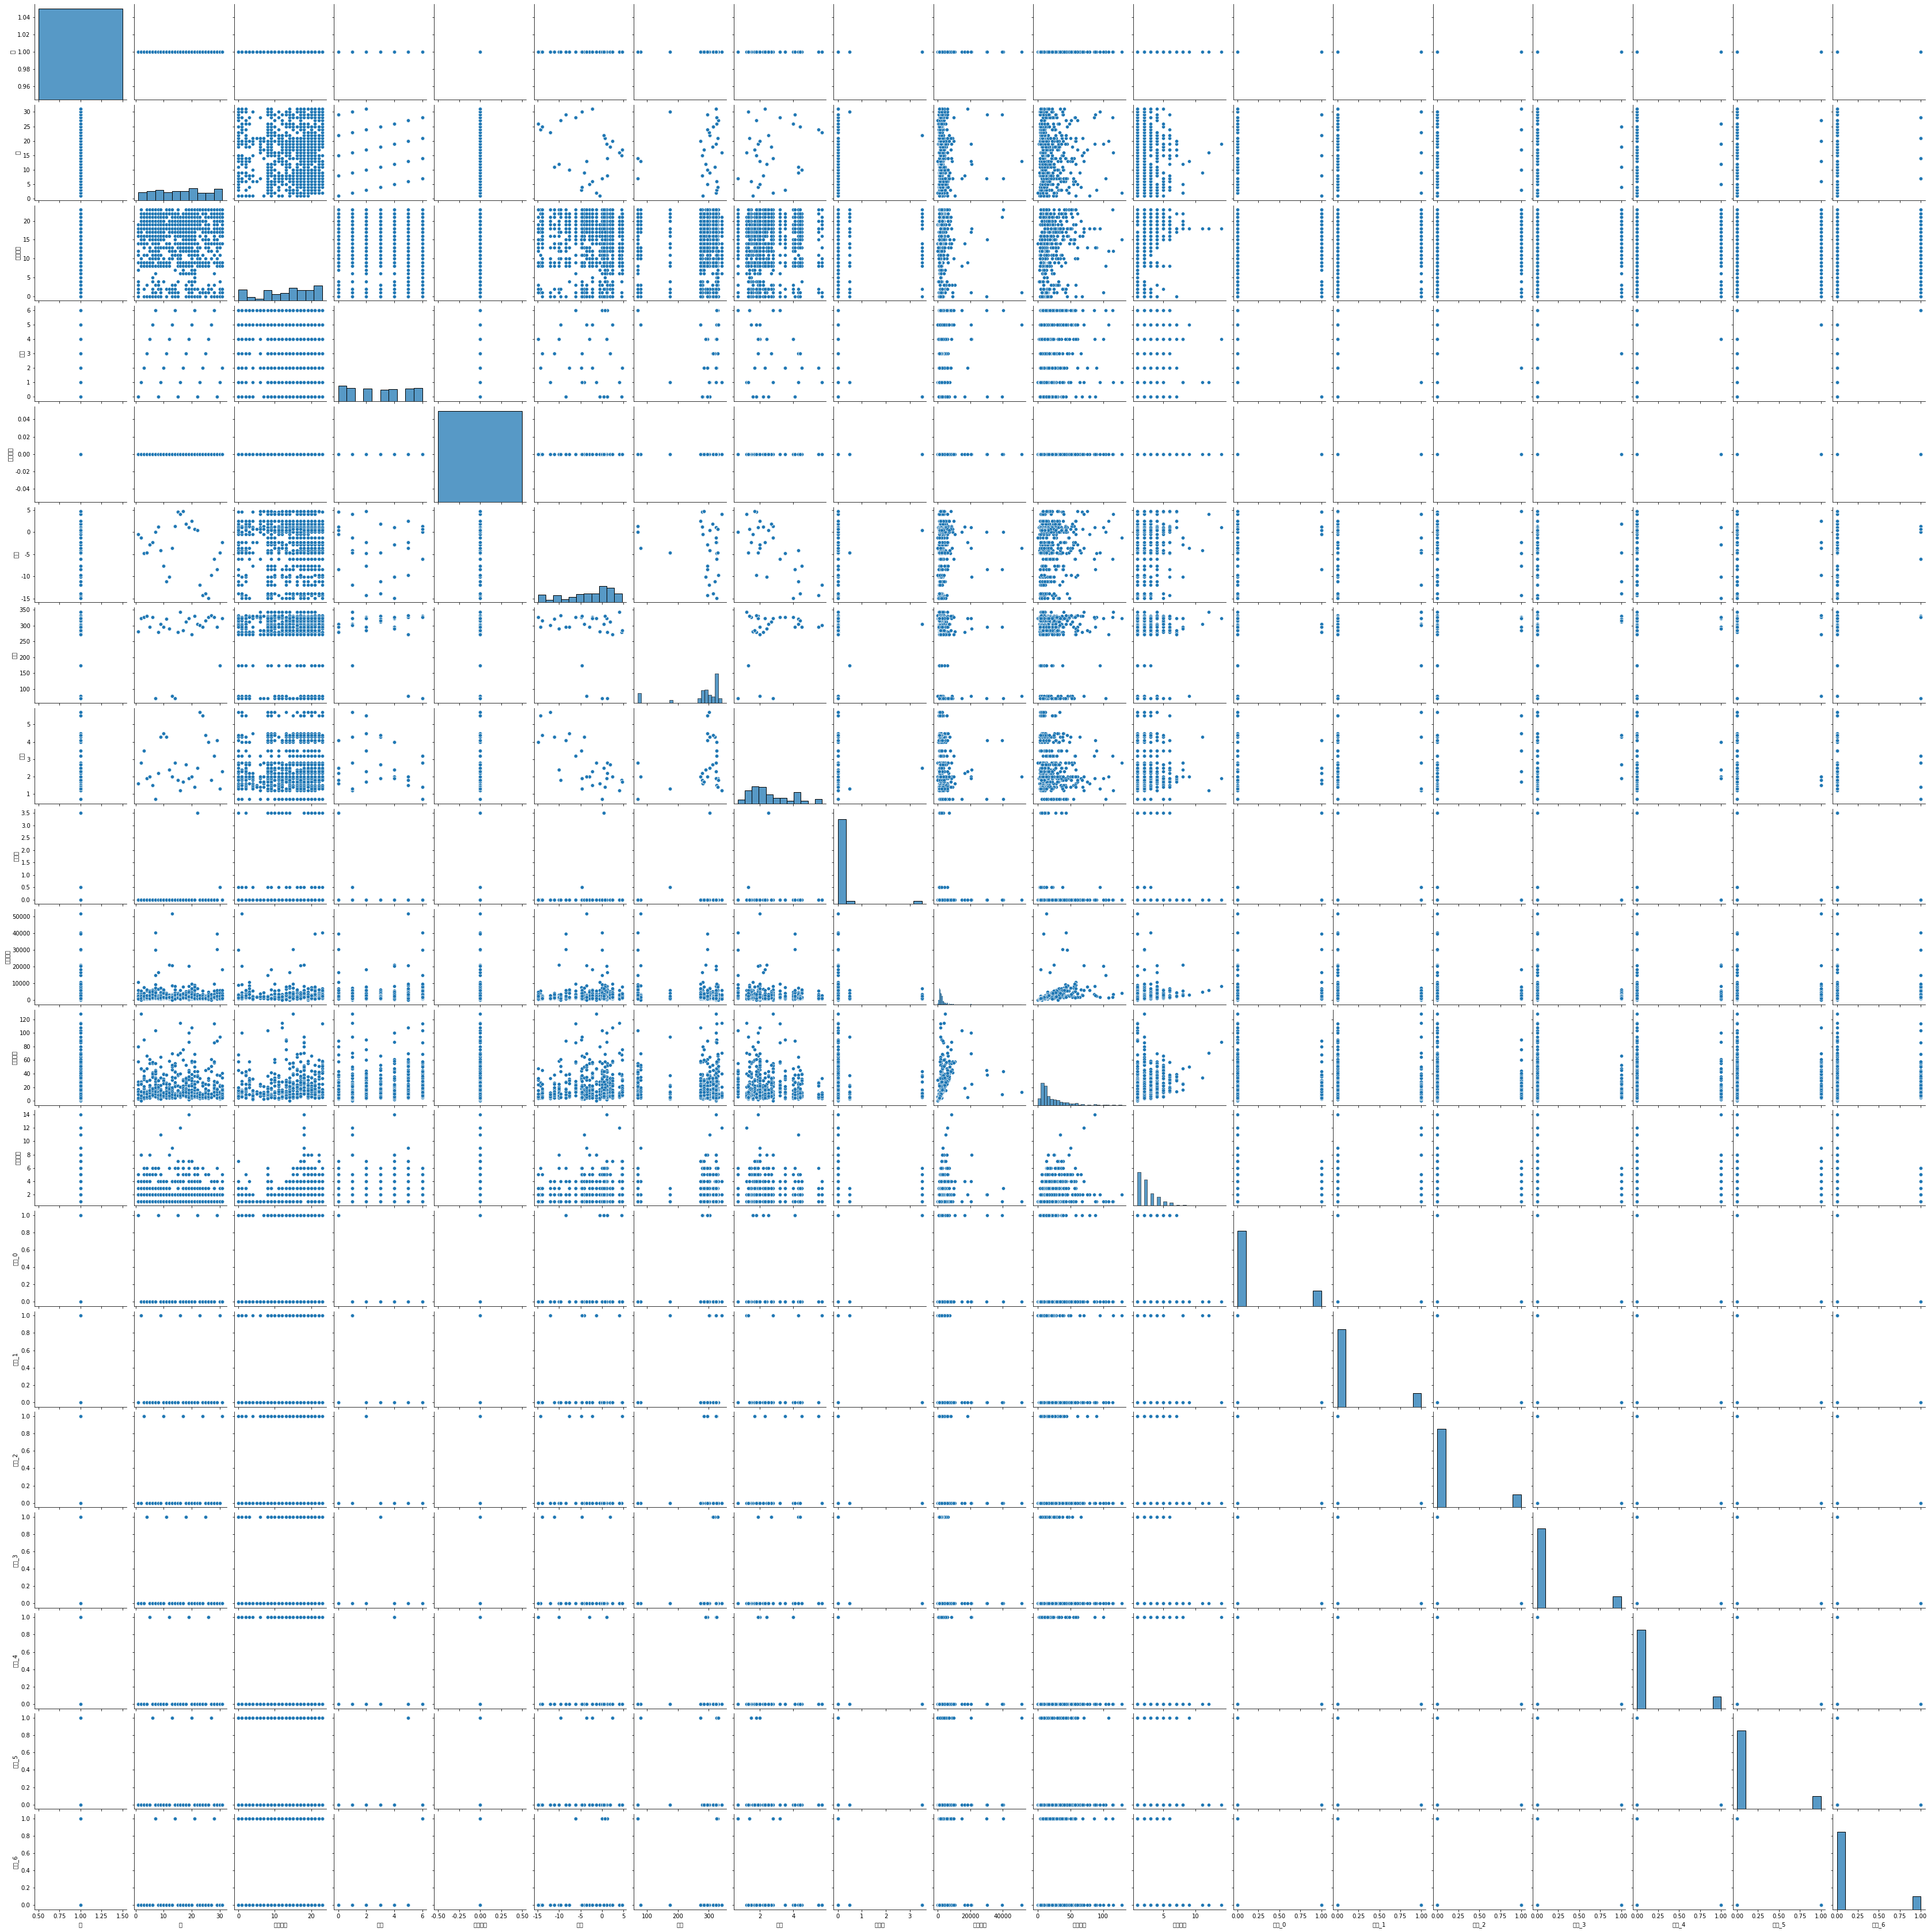

In [72]:
sns.pairplot(hongdae)
plt.show()

# 모델링.
# 1) Feature Engineering

In [64]:
hongdae.columns.values

array(['월', '일', '대여시간', '요일', '거치대수', '기온', '풍향', '풍속', '강수량', '이동거리',
       '이동시간', '이용건수'], dtype=object)

In [65]:
hongdae = hongdae.join(pd.get_dummies(hongdae['요일'], prefix="요일"))
hongdae.head()

,월,일,대여시간,요일,거치대수,기온,풍향,풍속,강수량,이동거리,이동시간,이용건수,요일_0,요일_1,요일_2,요일_3,요일_4,요일_5,요일_6
0,1,1,0,0,0.0,-0.5,281.3,1.6,0.0,1900.0,11.0,1,1,0,0,0,0,0,0
1,1,1,1,0,0.0,-0.5,281.3,1.6,0.0,2620.0,16.0,2,1,0,0,0,0,0,0
2,1,1,2,0,0.0,-0.5,281.3,1.6,0.0,2560.0,13.0,5,1,0,0,0,0,0,0
3,1,1,3,0,0.0,-0.5,281.3,1.6,0.0,10735.0,58.0,4,1,0,0,0,0,0,0
4,1,1,4,0,0.0,-0.5,281.3,1.6,0.0,2690.0,14.0,2,1,0,0,0,0,0,0


In [66]:
dayofweek = ["요일_"+str(i) for i in range(7)]
features = ['월', '대여시간', '기온', '풍향', '풍속', '강수량'] + dayofweek
features

['월',
 '대여시간',
 '기온',
 '풍향',
 '풍속',
 '강수량',
 '요일_0',
 '요일_1',
 '요일_2',
 '요일_3',
 '요일_4',
 '요일_5',
 '요일_6']

#  2) Train, Test 데이터 나누기

In [67]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(hongdae[features], hongdae['이용건수'], test_size=0.2, random_state=42)

# 3) 학습

In [68]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model as lm
import xgboost as xgb
from scipy.stats import uniform, randint

models = [
    ('lr', lm.LinearRegression(n_jobs=-1)),
    ('ridge', lm.Ridge()),
    ('lasso', lm.Lasso()),
    ('elastic', lm.ElasticNet()),
    ('LassoLars', lm.LassoLars()),
    ('LogisticRegression', lm.LogisticRegression()),
    ('SGDRegressor', lm.SGDRegressor()),
    ('Perceptron', lm.Perceptron(n_jobs=-1)),
    ('xgboost', xgb.XGBRegressor())
]
n = 3
params = {
    'lr' : {
        'fit_intercept': [True, False],
        'normalize': [True, False],
    },
    'ridge': {
        'alpha': [0.01, 0.1, 1.0, 10, 100],
        'fit_intercept': [True, False],
        'normalize': [True, False],
    },
    'lasso': {
        'alpha': [0.1, 1.0, 10],
        'fit_intercept': [True, False],
        'normalize': [True, False],
    },
    'elastic': {
        'alpha': [0.1, 1.0, 10],
        'normalize': [True, False],
        'fit_intercept': [True, False],
    },
    'LassoLars': {
        'alpha': [0.1, 1.0, 10],
        'normalize': [True, False],
        'fit_intercept': [True, False],
    },
    'LogisticRegression': {
        'penalty': ['l1', 'l2'],
        'C': [0.001, 0.01, 0.1, 1.0, 10, 100],
        'fit_intercept': [True, False],
    },
    'SGDRegressor': {
        'penalty': ['l1', 'l2'],
        'alpha': [0.001, 0.01, 0.1, 1.0, 10, 100],
        'fit_intercept': [True, False],
    },
    'Perceptron' :{
        'penalty': ['None', 'l1', 'l2'],
        'alpha': [0.001, 0.01, 0.1, 1.0, 10, 100],
        'fit_intercept': [True, False]
    },
    'xgboost': {
        "gamma": uniform(0, 0.5).rvs(n),
        "max_depth": range(2, 7), # default 3
        "n_estimators": randint(100, 150).rvs(n), # default 100
    }
}

best_model, best_mae = None, float('inf')
for model_name, model in models:
    param_grid = params[model_name]
    grid = GridSearchCV(model, cv=5, n_jobs=-1, param_grid=param_grid)
    grid = grid.fit(X_train, y_train)

    model = grid.best_estimator_
    predictions = model.predict(X_test)
    mae = mean_absolute_error(y_test, predictions)

    print(model_name, mae)

    if mae < best_mae:
        best_model = model

lr 1.1595705786104666
ridge 1.1544839498581032
lasso 1.158404092201122
elastic 1.1595913914007634
LassoLars 1.1584040566357865
LogisticRegression 1.4270833333333333
SGDRegressor 31781876487494.426
Perceptron 1.4479166666666667
[01:14:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
xgboost 1.0454595846434434


In [69]:
#베스트모델
best_model

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0.38790306151486514,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=2, min_child_weight=1, missing=None, n_estimators=115,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

findfont: Font family ['KoreanDRDSR'] not found. Falling back to DejaVu Sans.
findfont: Font family ['KoreanDRDSR'] not found. Falling back to DejaVu Sans.


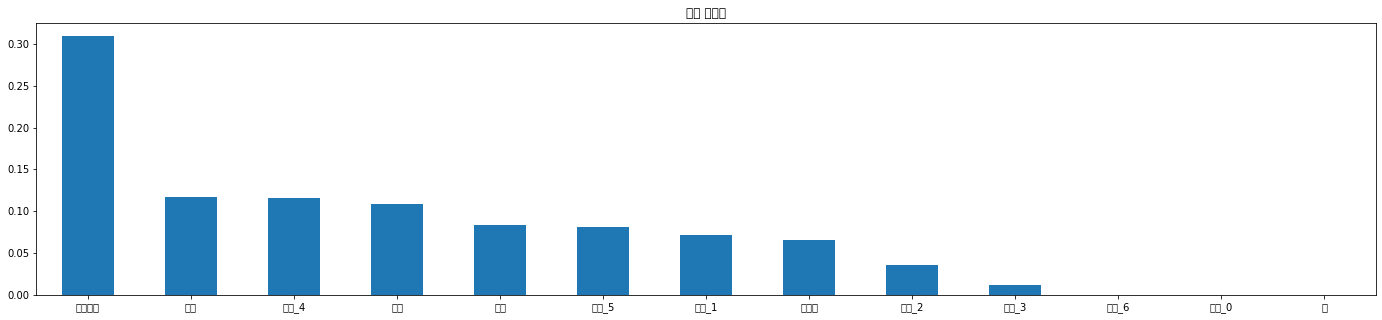

In [80]:
#변수별 중요도
font_family = font_manager.FontProperties(fname='./fonts/a두리둥실.ttf').get_name()
plt.rc('font', family=font_family)

feature_importance = pd.Series(index=features, data=best_model.feature_importances_).sort_values(ascending=False)
feature_importance.plot(kind='bar', figsize=(24, 5), title="피쳐 중요도", rot=0)
plt.show()

In [81]:
feature_importance

대여시간    0.309299
기온      0.117278
요일_4    0.115266
풍향      0.108555
풍속      0.083637
요일_5    0.081045
요일_1    0.071902
강수량     0.065543
요일_2    0.035350
요일_3    0.012124
요일_6    0.000000
요일_0    0.000000
월       0.000000
dtype: float32

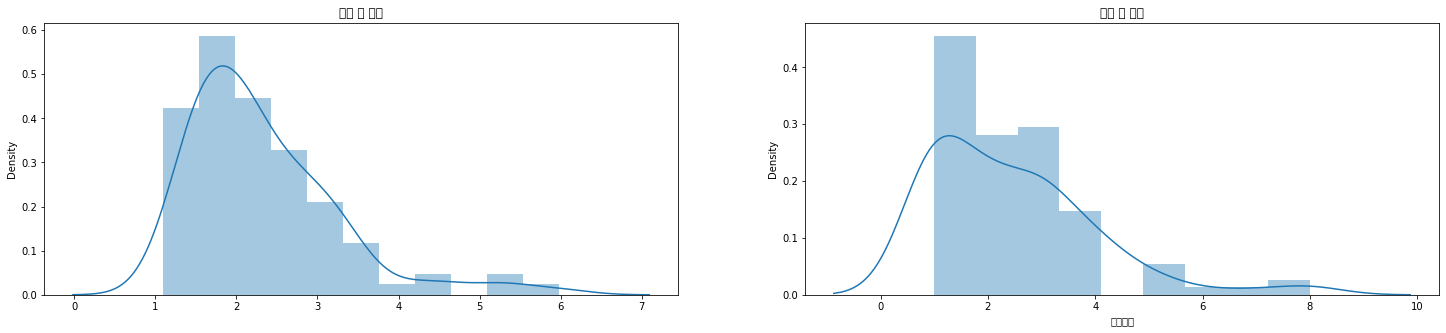

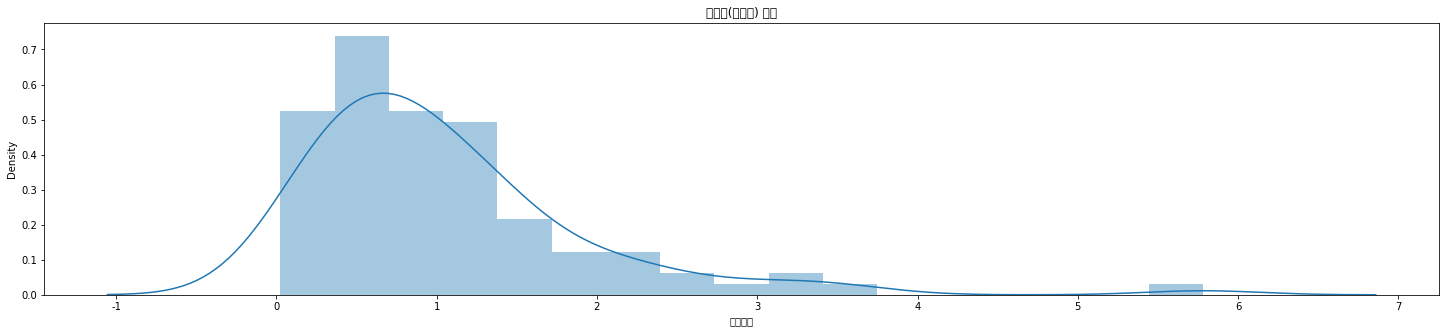

In [82]:
#예측값, 실제값, 오차값 분포
predictions = best_model.predict(X_test)

fig, axes = plt.subplots(1, 2, figsize=(25, 5))
sns.distplot(predictions, ax=axes[0])
axes[0].set_title("예측 값 분포")
sns.distplot(y_test, ax=axes[1])
axes[1].set_title("실제 값 분포")
plt.show()

plt.figure(figsize=(25, 5))
sns.distplot(abs(predictions - y_test))
plt.title("오차값(절대값) 분포")
plt.show()

In [83]:
# 마포구에 있는 모든 대여소에 대한 각각의 모델들(xgboost로)을 만들어보자.
n = 3
cols = ['월', '일', '대여시간', '요일', '거치대수', '기온', '풍향', '풍속', '강수량']

results = {}
total = df['대여소명'].nunique()

for idx, (name, _df) in enumerate(df.groupby('대여소명'), 1):
    print("[%d/%d] %s" %(idx, total, name), end=' ')

    try:
        _df = _df.groupby(cols)['이용건수'].sum().reset_index()
        _df = _df.join(pd.get_dummies(_df['요일'], prefix="요일"))

        print(_df.shape)

        X_train, X_test, y_train, y_test = train_test_split(_df[features], _df['이용건수'], test_size=0.2, random_state=42)

        param_grid = {
            "gamma": uniform(0, 0.5).rvs(n),
            "max_depth": range(2, 7), # default 3
            "n_estimators": randint(100, 150).rvs(n), # default 100
        }

        grid = GridSearchCV(xgb.XGBRegressor(), cv=5, n_jobs=-1, param_grid=param_grid)
        grid = grid.fit(X_train, y_train)

        model = grid.best_estimator_
        predictions = model.predict(X_test)
        mae = mean_absolute_error(y_test, predictions)

        results[name] = {}
        results[name]['model'] = model
        results[name]['mae'] = mae
        results[name]['errors'] = predictions - y_test

    except:
        continue

[1/69]  (구)합정동 주민센터 (105, 17)
[01:24:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[2/69]  DMC빌 앞 (146, 17)
[01:24:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[3/69]  DMC산학협력연구센터 앞 (240, 17)
[01:24:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[4/69]  DMC역 2번출구 옆 (192, 17)
[01:25:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[5/69]  DMC역 9번출구 앞 (299, 17)
[01:25:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[6/69]  DMC홍보관 (123, 17)
[01:25:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[7/69]  LG CNS앞 (194, 17)
[01:25:18] WARNING: /workspace/src/objec

In [84]:
#전체 평균 MAE
errors = np.array([result['mae'] for result in results.values()])
errors.mean()

0.5121920492033125

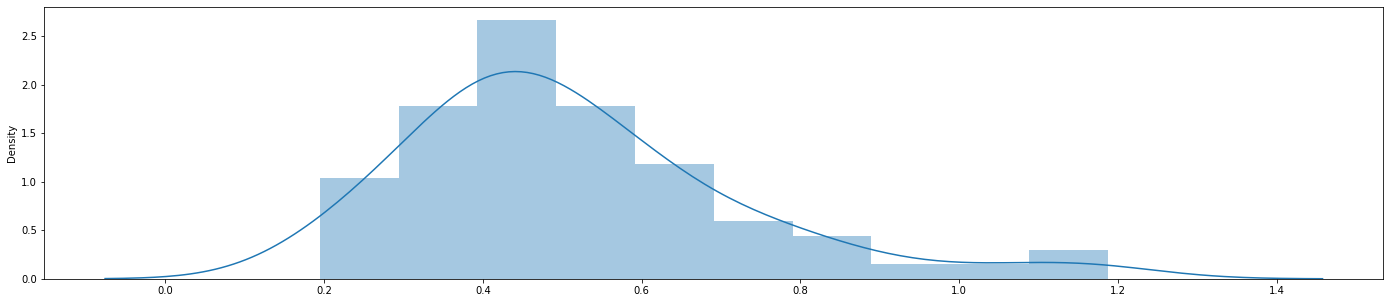

In [85]:
#전체 분포 MAE
plt.figure(figsize=(24, 5))
sns.distplot(errors)
plt.show()

# 결론
- 정리하면, 우리는 마포구 내 75개 대여소의 시간대별 대여건수 예측 모델을 만들어보았다.

- 각 대여소별로 모델을 가지며, 모델 베이스는 xgboost regression 모델이다.
모델에 [ '월', '대여시간', '요일', '기온(°C)', '풍향(deg)', '풍속(m/s)', '강수량(mm)', '습도(%)'] 를 입력으로 주면, 해당 시간의 예측한 대여건수를 출력해준다.
- 모델 예측 값이 실제값과 다른 정도는 0.5-3 의 값의 범위를 가지는데, 평균적으로는 1.0대, 즉 평균적으로 한 대 정도의 오차가 난다.
실제로는 대여소별로 예측하므로, 대여소별로 MAE(Mean absolute error) 를 보는게 맞긴 하다.
- 2018년 데이터 이므로, 2019년인 지금에 바로 적용가능하기엔 힘들겠지만,
15년도부터 공개된 데이터셋을 모두 학습시키고, 실시간 시간과 날씨정보를 가져오면, 실시간으로 대여건수를 예측할 수 있겠다.

# ★딥러닝으로 모델링해보기